# Exploratory Data Analysis

## Getting Started
### Libraries to Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read in Data

This is a fairly common dataset, here sourced from [data.world](https://data.world/data-society/capital-bikeshare-2011-2012), but also available from the UCI database.

In [2]:
df = pd.read_csv('Data/bike_data.csv')

## Data Cleaning

In [3]:
df.isnull().sum()

Date                   0
Season                 0
Hour                   0
Holiday                0
Day of the Week        0
Working Day            0
Weather Type           0
Temperature F          0
Temperature Feels F    0
Humidity               0
Wind Speed             0
Casual Users           0
Registered Users       0
Total Users            0
dtype: int64

Our date column was an object, so transform to a datetime with pandas and create a new column for Month.

In [4]:
df.Date = pd.to_datetime(arg=df.Date) #dtype('<M8[ns]')
df['Month'] = df['Date'].dt.month

In [5]:
df.sample(5)

,Date,Season,Hour,Holiday,Day of the Week,Working Day,Weather Type,Temperature F,Temperature Feels F,Humidity,Wind Speed,Casual Users,Registered Users,Total Users,Month
4179,2011-06-28,2,1,0,2,1,1,72.8,77.0,74,0,5,8,13,6
3903,2011-06-16,2,13,0,4,1,2,78.0,82.4,54,17,37,114,151,6
11339,2012-04-22,1,16,0,0,0,3,48.7,50.0,87,30,4,32,36,4
16912,2012-12-12,4,11,0,3,1,2,43.5,39.2,49,15,24,148,172,12
8274,2011-12-16,4,10,0,5,1,1,45.2,39.2,46,20,10,122,132,12


## Data Visualization

### Total Users Per Hour

We see spikes during rush hour (8 am and 5-6 pm) due to business travel, as expected. We see a dropoff in ridership after 8 pm.

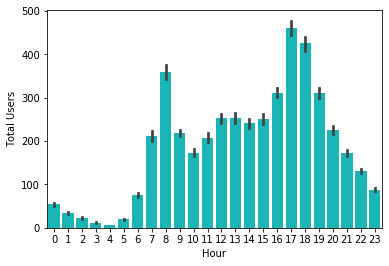

In [6]:
sns.barplot(data=df, x='Hour', y = 'Total Users', color = 'darkturquoise')

### Temperature Distributions

There is an interesting bimodal distribution of actual temperature in Fahrenheit. There are spikes at ~45 and ~70 degrees. We will see how this affects ridership later.

In [7]:
temp_f_range = [df['Temperature F'].min(), df['Temperature F'].max()]
print('The overall range of actual temperatures is: ', temp_f_range)

The overall range of actual temperatures is:  [17.6, 102.2]


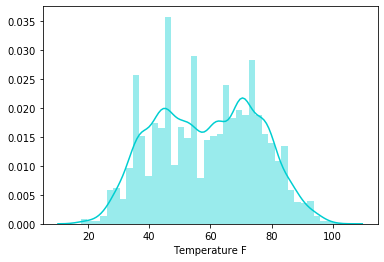

In [8]:
sns.distplot(df['Temperature F'], bins =40, color = 'darkturquoise')

Accounting for humidity/wind, we generate the "Feels Like" temperature which generally created more extremes than the raw temperature. 

In [9]:
temp_feels_f_range = [df['Temperature Feels F'].min(), df['Temperature Feels F'].max()]
print('The overall range of actual temperatures is: ', temp_feels_f_range)

The overall range of actual temperatures is:  [3.2, 122.0]


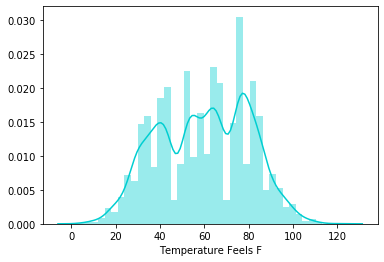

In [10]:
sns.distplot(df['Temperature Feels F'], bins =40, color = 'darkturquoise')

### Weather Type

The weather on each day was classified according to the descriptions below:

Weather Type:

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

As expected, there is a negative relationship between ridership and weather severity. We also see that registered users are the main contributors to overall ridership and are more likely to ride even in poor conditions.

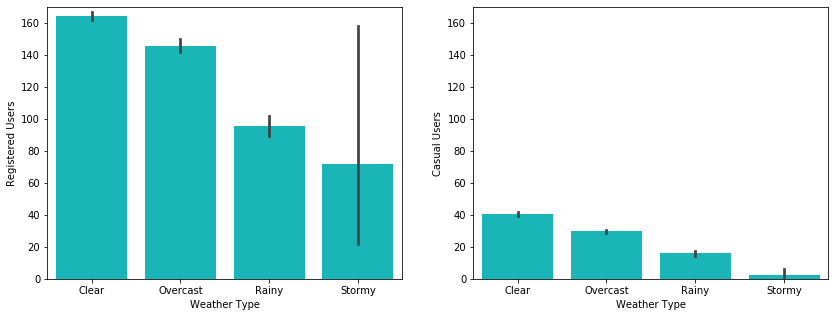

In [11]:
fig, ax = plt.subplots(1,2)
sns.barplot(data=df, x = 'Weather Type', y = 'Registered Users', color = 'darkturquoise', ax = ax[0]
                    ).set_xticklabels(['Clear','Overcast','Rainy','Stormy'])
sns.barplot(data=df, x = 'Weather Type', y = 'Casual Users', color = 'darkturquoise', ax = ax[1]
                   ).set_xticklabels(['Clear','Overcast','Rainy','Stormy'])
ax[0].set(ylim=(0, 170))
ax[1].set(ylim=(0, 170))
fig.set_figheight(5)
fig.set_figwidth(14)
plt.show()

### Day of the Week

As above, registered users make up a majority of ridership. However, we see different patterns in our two cohorts relating to the days of the week. Registered users, who are more likely to be business travelers, have heavier usage during the workweek and less on the weekends. Casual users are the opposite, they are much more likely to ride on the weekends for leisure.

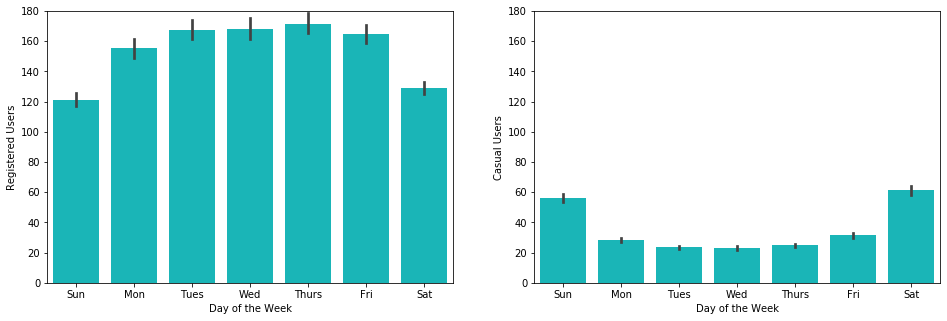

In [12]:
fig, ax = plt.subplots(1,2)
sns.barplot(data=df, x = 'Day of the Week', y = 'Registered Users', color = 'darkturquoise', ax = ax[0]
                    ).set_xticklabels(['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'])
sns.barplot(data=df, x = 'Day of the Week', y = 'Casual Users', color = 'darkturquoise', ax = ax[1]
                   ).set_xticklabels(['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'])
ax[0].set(ylim=(0, 180))
ax[1].set(ylim=(0, 180))
fig.set_figheight(5)
fig.set_figwidth(16)
plt.show()

### Holidays

As is the pattern, registered riders account for a majority of all rides regardless of if that day is a holiday. Most holidays are not given off so most business travelers will still need to bike. Casual riders are slightly more likely to bike on a holiday, but not significantly.

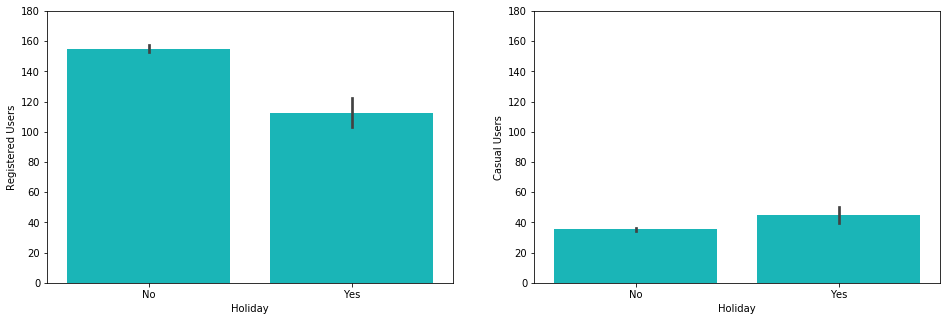

In [18]:
fig, ax = plt.subplots(1,2)
sns.barplot(data=df, x = 'Holiday', y = 'Registered Users', color = 'darkturquoise', ax = ax[0]
                    ).set_xticklabels(['No', 'Yes'])
sns.barplot(data=df, x = 'Holiday', y = 'Casual Users', color = 'darkturquoise', ax = ax[1]
                   ).set_xticklabels(['No', 'Yes'])
ax[0].set(ylim=(0, 180))
ax[1].set(ylim=(0, 180))
fig.set_figheight(5)
fig.set_figwidth(16)
plt.show()

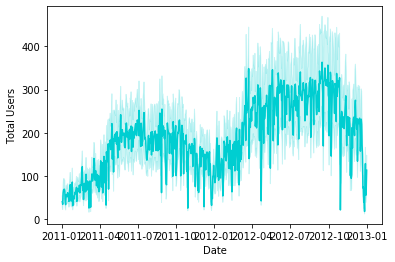

In [14]:
sns.lineplot(x=df.Date, y=df['Total Users'], color = 'darkturquoise')

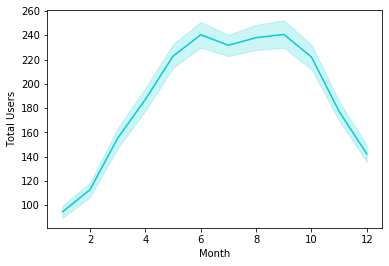

In [15]:
sns.lineplot(x=df.Month, y=df['Total Users'], color = 'darkturquoise')

## Correlations

In [16]:
corr = df.corr()
corr.style.background_gradient(cmap='twilight_shifted').set_precision(2)

,Season,Hour,Holiday,Day of the Week,Working Day,Weather Type,Temperature F,Temperature Feels F,Humidity,Wind Speed,Casual Users,Registered Users,Total Users,Month
Season,1.00,0.00,0.06,-0.00,-0.04,0.04,-0.47,-0.47,0.01,-0.04,-0.23,-0.10,-0.14,0.21
Hour,0.00,1.00,0.00,-0.00,0.00,-0.02,0.14,0.13,-0.28,0.14,0.30,0.37,0.39,-0.01
Holiday,0.06,0.00,1.00,-0.10,-0.25,-0.02,-0.03,-0.03,-0.01,0.00,0.03,-0.05,-0.03,0.02
Day of the Week,-0.00,-0.00,-0.10,1.00,0.04,0.00,-0.00,-0.01,-0.04,0.01,0.03,0.02,0.03,0.01
Working Day,-0.04,0.00,-0.25,0.04,1.00,0.04,0.06,0.05,0.02,-0.01,-0.30,0.13,0.03,-0.00
Weather Type,0.04,-0.02,-0.02,0.00,0.04,1.00,-0.10,-0.11,0.42,0.03,-0.15,-0.12,-0.14,0.01
Temperature F,-0.47,0.14,-0.03,-0.00,0.06,-0.10,1.00,0.99,-0.07,-0.02,0.46,0.34,0.40,0.20
Temperature Feels F,-0.47,0.13,-0.03,-0.01,0.05,-0.11,0.99,1.00,-0.05,-0.06,0.45,0.33,0.40,0.21
Humidity,0.01,-0.28,-0.01,-0.04,0.02,0.42,-0.07,-0.05,1.00,-0.29,-0.35,-0.27,-0.32,0.16
Wind Speed,-0.04,0.14,0.00,0.01,-0.01,0.03,-0.02,-0.06,-0.29,1.00,0.09,0.08,0.09,-0.14


We see some expected correlations, mainly actual temperature versus "feels like" temperature as the latter is a modified version of the former accounting for Humidity. We also see various environmental factors loosely correlated with Season. Finally, in terms of our ridership, we see a positive relationship between temperature and riders as well as hours and riders. 

Our subsets of riders should show strong multicollinearity because Total Users = Casual Users + Registered Users.